In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [15]:
df = pd.DataFrame({
    'ds': pd.date_range(start='2024-01-01', periods=100, freq='D'),  # 100 days
    'y': [50 + i*0.5 + (i % 7) * 5 for i in range(100)]  # Sales pattern
})

In [16]:
df.tail(10)

,ds,y
90,2024-03-31,125.0
91,2024-04-01,95.5
92,2024-04-02,101.0
93,2024-04-03,106.5
94,2024-04-04,112.0
95,2024-04-05,117.5
96,2024-04-06,123.0
97,2024-04-07,128.5
98,2024-04-08,99.0
99,2024-04-09,104.5


In [17]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpws08dz2_/6p7bul31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpws08dz2_/v4hurcgu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93777', 'data', 'file=/tmp/tmpws08dz2_/6p7bul31.json', 'init=/tmp/tmpws08dz2_/v4hurcgu.json', 'output', 'file=/tmp/tmpws08dz2_/prophet_model1uwf9xaf/prophet_model-20250218135711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:57:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:57:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
# Step 3: Predict Next 30 Days 📆
future = model.make_future_dataframe(periods=30)  # Add 30 future days
forecast = model.predict(future)

In [19]:
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
100,2024-04-10,114.999498,109.982253,110.016615,114.999381,114.999704,-4.999368,-4.999368,-4.999368,-4.999368,-4.999368,-4.999368,0.0,0.0,0.0,110.000130
101,2024-04-11,115.499445,115.481981,115.517824,115.498698,115.500602,0.000432,0.000432,0.000432,0.000432,0.000432,0.000432,0.0,0.0,0.0,115.499877
102,2024-04-12,115.999392,120.983052,121.017371,115.997441,116.002005,5.000003,5.000003,5.000003,5.000003,5.000003,5.000003,0.0,0.0,0.0,120.999395
103,2024-04-13,116.499339,126.481650,126.516692,116.495937,116.503607,9.999502,9.999502,9.999502,9.999502,9.999502,9.999502,0.0,0.0,0.0,126.498841
104,2024-04-14,116.999287,131.980267,132.017493,116.994133,117.005507,14.999454,14.999454,14.999454,14.999454,14.999454,14.999454,0.0,0.0,0.0,131.998740
105,2024-04-15,117.499234,102.481816,102.518646,117.491922,117.507164,-15.000180,-15.000180,-15.000180,-15.000180,-15.000180,-15.000180,0.0,0.0,0.0,102.499054
106,2024-04-16,117.999181,107.978223,108.018973,117.989989,118.009900,-9.999843,-9.999843,-9.999843,-9.999843,-9.999843,-9.999843,0.0,0.0,0.0,107.999338
107,2024-04-17,118.499128,113.478488,113.522049,118.487470,118.512684,-4.999368,-4.999368,-4.999368,-4.999368,-4.999368,-4.999368,0.0,0.0,0.0,113.499760
108,2024-04-18,118.999075,118.978223,119.023455,118.984225,119.015617,0.000432,0.000432,0.000432,0.000432,0.000432,0.000432,0.0,0.0,0.0,118.999508
109,2024-04-19,119.499023,124.473921,124.525996,119.481394,119.519081,5.000003,5.000003,5.000003,5.000003,5.000003,5.000003,0.0,0.0,0.0,124.499025


In [20]:
print(forecast[['ds', 'yhat']].tail(30))

            ds        yhat
100 2024-04-10  110.000130
101 2024-04-11  115.499877
102 2024-04-12  120.999395
103 2024-04-13  126.498841
104 2024-04-14  131.998740
105 2024-04-15  102.499054
106 2024-04-16  107.999338
107 2024-04-17  113.499760
108 2024-04-18  118.999508
109 2024-04-19  124.499025
110 2024-04-20  129.998472
111 2024-04-21  135.498371
112 2024-04-22  105.998684
113 2024-04-23  111.498969
114 2024-04-24  116.999390
115 2024-04-25  122.499138
116 2024-04-26  127.998656
117 2024-04-27  133.498102
118 2024-04-28  138.998001
119 2024-04-29  109.498314
120 2024-04-30  114.998599
121 2024-05-01  120.499021
122 2024-05-02  125.998768
123 2024-05-03  131.498286
124 2024-05-04  136.997733
125 2024-05-05  142.497631
126 2024-05-06  112.997945
127 2024-05-07  118.498229
128 2024-05-08  123.998651
129 2024-05-09  129.498399


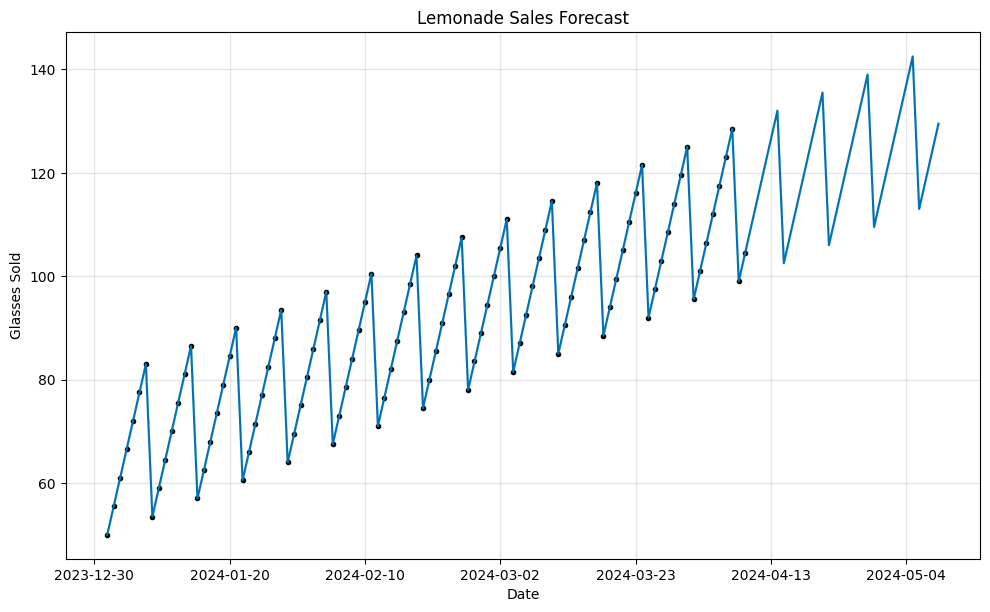

In [21]:
fig = model.plot(forecast)
plt.title("Lemonade Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Glasses Sold")
plt.show()